### Relation between Sales and TV

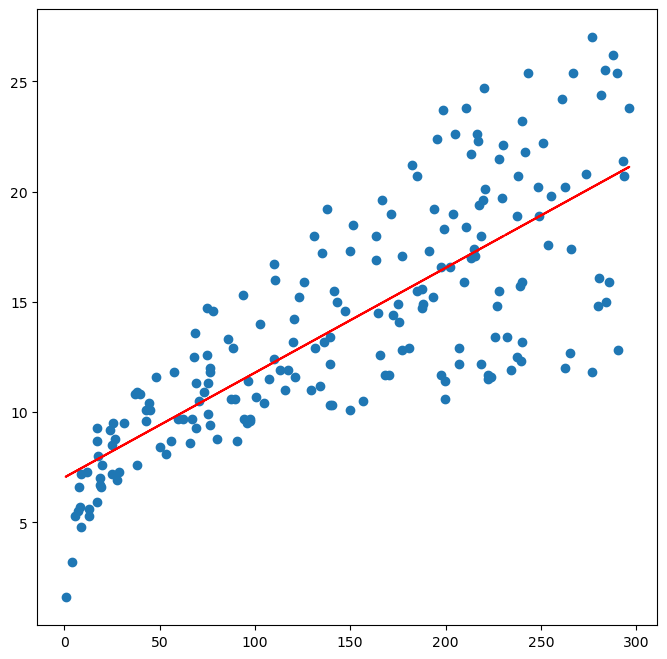

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

Adv = pd.read_csv("Advertising.csv")
# print(Adv.head())
x = Adv['TV']
y = Adv['sales']
f, a = subplots(figsize = [8,8])
a.scatter(x,y)

x_avg = np.average(x)
y_avg = np.average(y)


n = len(Adv['sales'])

b1=0  
b1_num=0
b1_den =0
b0 = 0
for j in range(n):
    b1_num += (x[j]- x_avg) * (y[j]- y_avg)
    b1_den += (x[j]- x_avg)**2
b1 = b1_num/b1_den
b0 = y_avg - b1*x_avg
y_pre = b0 + b1*x

a.plot(x,y_pre, color = "r")
    

# Study of Boston Dataset

#### Finding the relation between Boston's variables using correlation matrix.

Text(0.5, 1.0, 'Correlation matrix')

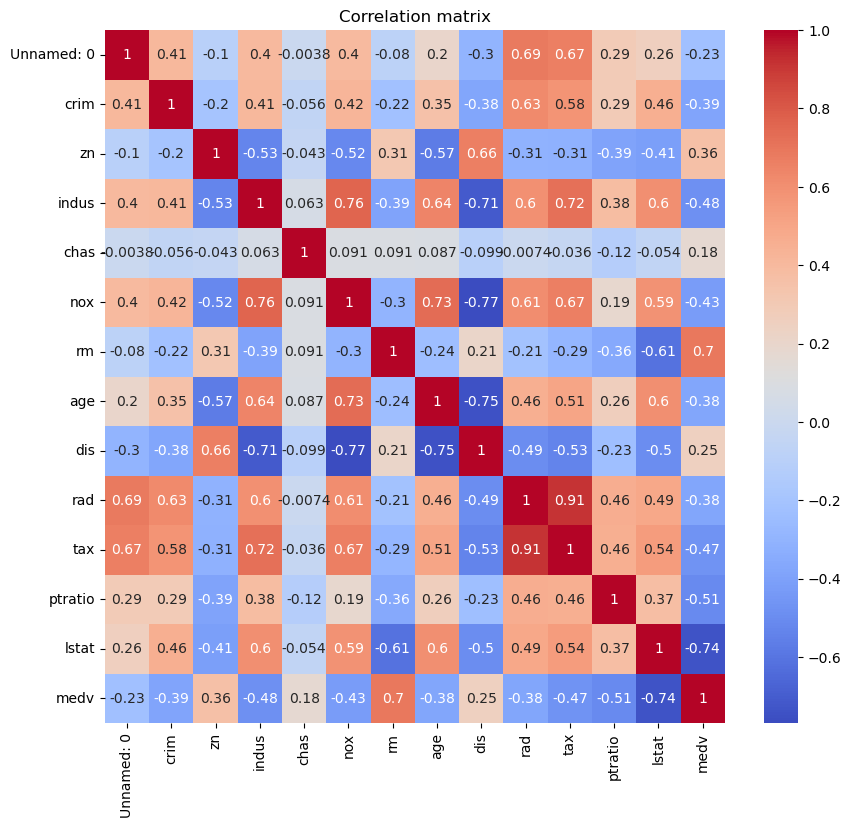

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt



boston = pd.read_csv("Boston.csv")
# bos_inf = boston.info()

co_rel = boston.corr()
k,l = subplots(figsize = (10,9))
sns.heatmap(co_rel, annot= True, cmap='coolwarm' )
l.set_title('Correlation matrix')
    

### Clearly from Correlation matrix: 
1. We can see that 'rm' has a positive correlation with 'medv' 
2.  And 'rm' and 'lstat' are negatively correlated with each other.
 3. The correlation between 'rm' and 'lstat' is -0.73
 4. The correlation between 'rm' and 'medv' is 0.70





##  Simple Linear Regression
Objective : Fitting a line between medv (response) and rm (predictor) y_pre = b0 + b1*x
where b0 is the intercept and b1 is the slope of the line.
1. b1(slop) and b0(intercept) we get by minimizing function Residue sum of square.
2. Residue sum of square = Σ(y - (b0 + b1*x))^2
3. Plotting of actual response and predictor in scattered way.
4. Plotting of predicted response and predictor in form of strainght line.
5. Residual plotting: Grey lines indicate the residuals (vertical distance between actual and predicted values).
6. Error Analysis: 
    - Residual Sum of Square (RSS).
    - Residual Standard Error (RSE).
    - Standard Error(b0).
    - Standard Error(b1).
7. Confidence Interval of b0 and b1.
8. t-statistic : t = b1/Standard Error(b1)
9. Model Efficiency : R^2 = 1- RSS/TSS.
10. Correlation between response and predictor.Also verified by R^2 = Correlation^2






### Simple Linear regression between 'medv' and 'rm'

The value of b0 is : -34.67062077643851
The value of b1 is : 9.102108981180303
The RSS is : 22061.87919621181
The RSE is : 6.616159749715358
The standard error of b0 is 2.6498029930097333
The standard error of b1 is 0.41902656012134015
The confident interval of b0 is -39.970226762457976 to -29.371014790419046
The confident interval of b1 is 8.264055860937622 to 9.940162101422983
t-statistic is  21.722033511538143
The TSS is: 42716.2954150198
The efficiency of the model is: 0.4835254559913343
The correlation between 'rm' and 'medv' is: 0.6953599470715388
The R_sqr 0.4835254559913343 The sqr of correlation is  0.48352545599133323


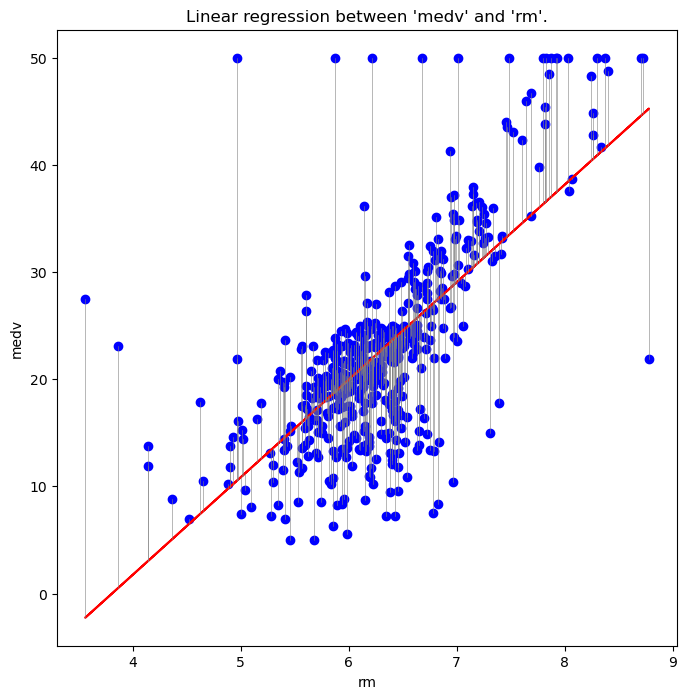

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def est_coeff(x,y):
    b1_num = 0
    b1_den = 0
    x_avg = np.average(x)
    y_avg = np.average(y)
    n = len(x)
    for j in range(n):
        b1_num += (x[j]-x_avg)*(y[j]- y_avg)
        b1_den += (x[j]-x_avg)**2
    b1 = b1_num / b1_den
    b0 = y_avg - b1 * x_avg
    return b0, b1

def corr(x,y):
    n = len(x) 
    x_avg = np.average(x)
    y_avg = np.average(y)
    cor_den1 = 0
    cor_den2 = 0
    cor_num = 0
    for j in range(n):
        cor_num += (x[j]-x_avg)*(y[j]- y_avg)
        cor_den1 += (x[j]-x_avg)**2
        cor_den2 += (y[j]-y_avg)**2
    cor_den = np.sqrt(cor_den1 * cor_den2)
    return cor_num / cor_den

boston = pd.read_csv("Boston.csv")
x = boston['rm']
y = boston['medv']

n = len(x)
x_avg = np.average(x)
y_avg = np.average(y)
b1_den = sum((x - x_avg)**2)

f , a = plt.subplots(figsize = [8,8]) 

a.scatter(x, y, color='b')
a.set_xlabel('rm')
a.set_ylabel('medv')
a.set_title("Linear regression between 'medv' and 'rm'.")

b0, b1 = est_coeff(x, y)
print("The value of b0 is :", b0)
print("The value of b1 is :", b1)
y_pre = b0 + x * b1

a.plot(x, y_pre, color = "r")

#mapping actual points to linear regression
for i in range(len(x)):
    a.plot([x[i], x[i]], [y[i], y_pre[i]], color = 'gray', linewidth = 0.4)

# Calculating the square error:
rss = 0  # rss = Residual sum of squares
for i in range(n): 
    rss += (y[i] - y_pre[i])**2

rse = np.sqrt(rss / (n - 2))  # rse = Residual standard error
rse_sq = rse**2
std_err_b0 = np.sqrt(rse_sq * (1/n + (x_avg**2)/b1_den))
std_err_b1 = np.sqrt(rse_sq / b1_den)

print("The RSS is :", rss)
print("The RSE is :", rse)
print("The standard error of b0 is", std_err_b0)
print("The standard error of b1 is", std_err_b1)

print("The confident interval of b0 is",b0-2*std_err_b0,"to", b0+2*std_err_b0)
print("The confident interval of b1 is",b1-2*std_err_b1,"to", b1+2*std_err_b1)

t = abs(b1 / std_err_b1)
print("t-statistic is ",t)

# Efficiency of the model
tss = 0
for i in range(n):
    tss += (y[i] - y_avg)**2
print("The TSS is:", tss)
print("The efficiency of the model is:", (tss - rss)/tss)

# Calculating the correlation 
r =  corr(x, y)

print("The correlation between 'rm' and 'medv' is:", r) 
print("The R_sqr", (tss - rss)/tss, "The sqr of correlation is ", r**2)


#### Graph Explanation:
The scatter plot below visualizes the relationship between the average number of rooms (rm) and the median house value (medv).
- X-axis : Average number of rooms (x)
- Y axis: Median house price (y)
- Blue dots represent the actual data points.
- The red line represents the linear regression line that best fits the data points.
- Gray vertical lines indicate residuals (errors) between actual and predicted values.

### Simple Linear regression between 'medv' and 'lstat'

The RSS is : 19472.381418326455
The RSE is : 6.215760405398071
The standard error of b0 is 0.5626273549884333
The standard error of b1 is 0.03873341621263943
The confident interval of b0 is 33.42858616940624 to 35.67909558935997
The confident interval of b1 is -1.0275161861832696 to -0.8725825213327119
t-statistic is  24.527899851187723
The TSS is:  42716.2954150198
The efficiency of the model is R_sqr: 0.5441462975864797
The correlation between 'lstat' and 'medv' is: -0.7376627261740145
The R_sqr 0.5441462975864797 The sqr of correlation is  0.5441462975864791


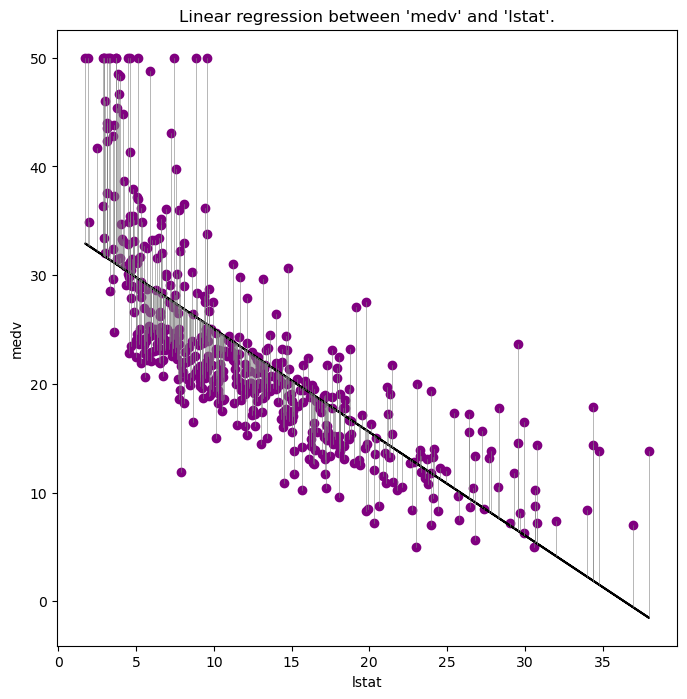

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def est_coeff(x, y):
    b1_num = 0
    b1_den = 0
    x_avg = np.average(x)
    y_avg = np.average(y)
    n = len(x)
    for j in range(n):
        b1_num += (x[j] - x_avg) * (y[j] - y_avg)
        b1_den += (x[j] - x_avg) ** 2
    b1 = b1_num / b1_den
    b0 = y_avg - b1 * x_avg
    return b0, b1

def corr(x, y):
    n = len(x) 
    x_avg = np.average(x)
    y_avg = np.average(y)
    cor_den1 = 0
    cor_den2 = 0
    cor_num = 0
    for j in range(n):
        cor_num += (x[j] - x_avg) * (y[j] - y_avg)
        cor_den1 += (x[j] - x_avg) ** 2
        cor_den2 += (y[j] - y_avg) ** 2
    cor_den = np.sqrt(cor_den1 * cor_den2)
    return cor_num / cor_den

boston = pd.read_csv("Boston.csv")
x = boston['lstat']
y = boston['medv']

f, a = plt.subplots(figsize=(8, 8)) 

a.scatter(x, y, color='purple')
a.set_xlabel("lstat")
a.set_ylabel('medv')
a.set_title("Linear regression between 'medv' and 'lstat'.")

b0, b1 = est_coeff(x, y)
y_pre = b0 + b1 * x
a.plot(x, y_pre, color='black')

for i in range(len(x)):
    a.plot([x[i], x[i]], [y[i], y_pre[i]], color='gray', linewidth=0.4)

n = len(x)
x_avg = np.average(x)
y_avg = np.average(y)
b1_den = sum((x - x_avg) ** 2)  

rss = 0
for i in range(n): 
    rss += (y[i] - y_pre[i]) ** 2
    # b1_den += (x[i] - np.average(x))  

rse = np.sqrt(rss / (n - 2))  # rse = Residual standard error
rse_sq = rse ** 2
std_err_b0 = np.sqrt(rse_sq * (1/n + (x_avg**2) / b1_den))
std_err_b1 = np.sqrt(rse_sq / b1_den)

print("The RSS is :", rss)
print("The RSE is :", rse)
print("The standard error of b0 is", std_err_b0)
print("The standard error of b1 is", std_err_b1)

print("The confident interval of b0 is",b0-2*std_err_b0,"to", b0+2*std_err_b0)
print("The confident interval of b1 is",b1-2*std_err_b1,"to", b1+2*std_err_b1)

# Hypothesis test 
t_b1 = abs(b1 / std_err_b1)
print("t-statistic is ", t_b1)
t_b0 = abs(b0 / std_err_b0)

# Efficiency of the model
tss = 0
for i in range(n):
    tss += (y[i] - y_avg) ** 2  

print("The TSS is: ", tss)
R_sqr = (tss - rss) / tss
print("The efficiency of the model is R_sqr:", R_sqr)

# Calculating the correlation 
r = corr(x, y)
print("The correlation between 'lstat' and 'medv' is:", r)
print("The R_sqr", R_sqr, "The sqr of correlation is ", r ** 2)


#### Graph Explanation:
The scatter plot below visualizes the relationship between Age of the house (lstat) and the median house value (medv).
- X-axis : Age of the house (x)
- Y axis: Median house price (y)
- Blue dots represent the actual data points.
- The black line represents the linear regression line that best fits the data points.
- Gray vertical lines indicate residuals (errors) between actual and predicted values.

#  Multiple Linear Regression

What we are gonna apply in multiple linear regression :

1. Does really there exist relation between response and predictor (*Hypothesis test*)
2. How strong is the relationship between response and predictor (*Deciding important variable by correlation coefficient*)
3. How good is the model in predicting the response variable (*R-Squared value (closer to one excellent model*))
4. How good is the model in predicting the response variable (*Residual Standard Error (RSE)*)
- We have a dependent variable (y) and independent variables (x1, x2)
- We have to find the relationship between the independent variables and the dependent variable
- We have to find the best fit line for the data

H1 hypothesis is true, F-statistic is :  495.72043923976173
RSE is :  5.540257366988671
R squared is :  0.6385616062603405
Correlation between actual and predicted response is :  0.7991004982230568
The R_sqr 0.6385616062603405 The sqr of correlation is  0.6385616062603376


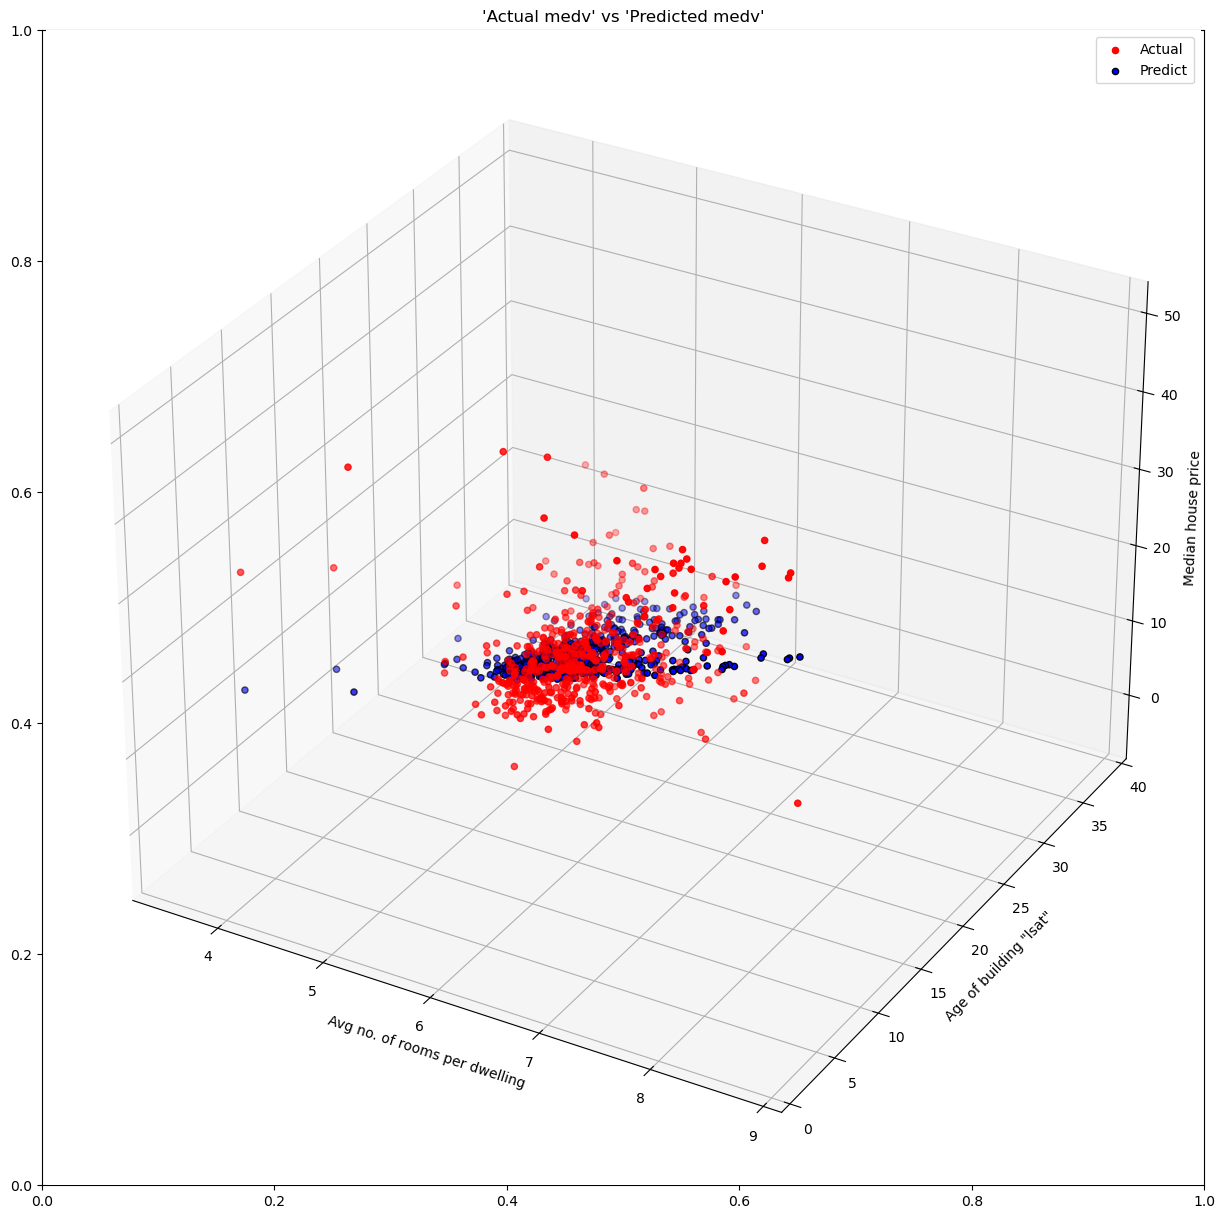

Text(0.5, 1.0, 'Actual vs predicted')

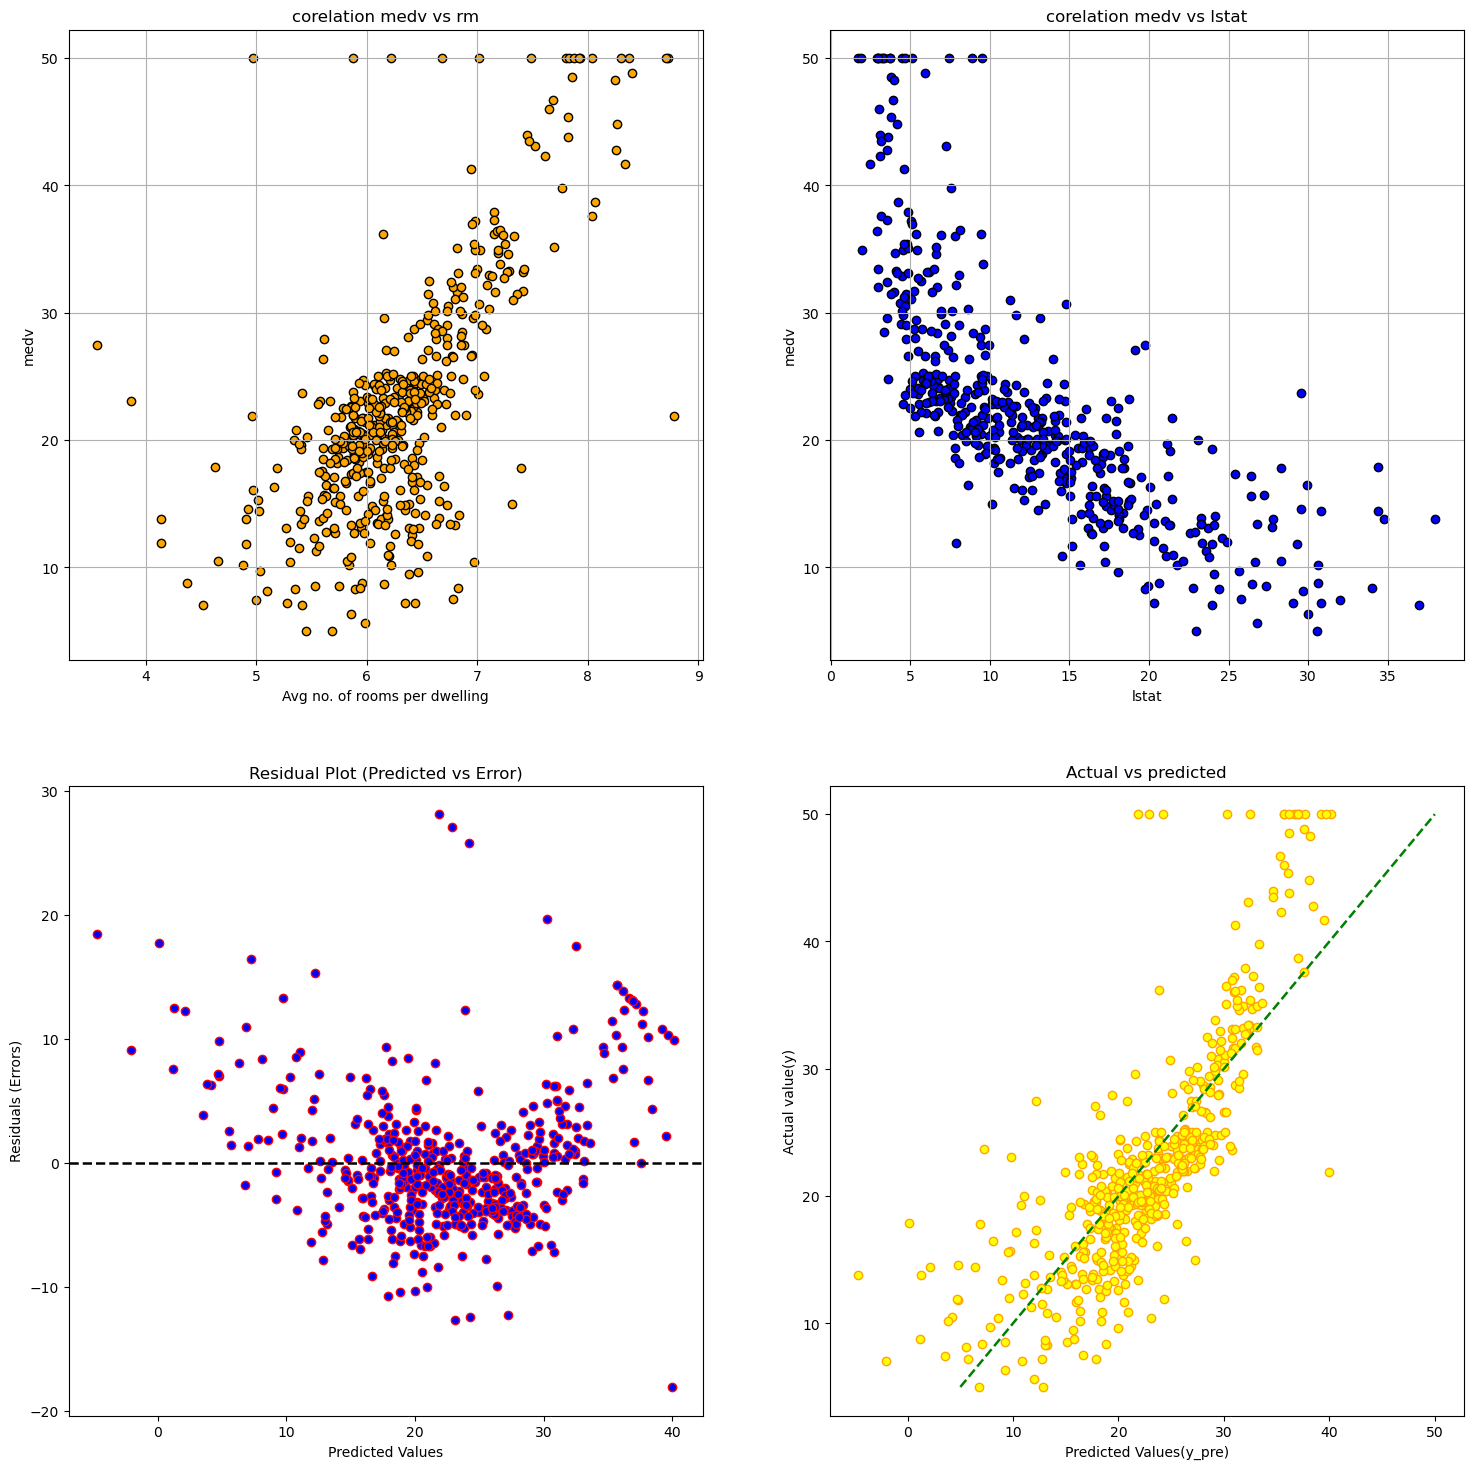

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import subplots

def corr(x, y):
    n = len(x) 
    x_avg = np.average(x)
    y_avg = np.average(y)
    cor_den1 = 0
    cor_den2 = 0
    cor_num = 0
    for j in range(n):
        cor_num += (x[j] - x_avg) * (y[j] - y_avg)
        cor_den1 += (x[j] - x_avg) ** 2
        cor_den2 += (y[j] - y_avg) ** 2
    cor_den = np.sqrt(cor_den1 * cor_den2)
    return cor_num / cor_den

boston = pd.read_csv("Boston.csv")
x1 = boston['rm']
x2 = boston['lstat']
y = boston['medv']
n = len(x1)
p = 2 #numbers of predictors 
x = np.array([np.ones(n), x1 , x2]).T 
y = np.array(y)
beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

y_pre = x.dot(beta)

#calculating the error
tss = 0
rss = 0
y_avg = np.average(y)
for i in range(n):
    tss += (y[i] - y_avg) ** 2
    rss += (y[i] - y_pre[i]) ** 2

#calculating the hypothesis 
F_stat = ((tss-rss)/p)/((rss)/n-p-1)
if np.round(F_stat) == 1:
    print("H0 hypothesis is true, F statistic  is approx 1")
else:
    print("H1 hypothesis is true, F-statistic is : ", F_stat)

rse = np.sqrt(rss/(n-p-1))
print("RSE is : ", rse)
R_sqr = 1-rss/tss
print("R squared is : ", R_sqr)

r = corr(y, y_pre)
print("Correlation between actual and predicted response is : ", r)
print("The R_sqr", R_sqr, "The sqr of correlation is ", r ** 2)

residuals = y - y_pre

#3d graph plotting
fig, ax = subplots(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x1, x2, y, color = 'r', label= 'Actual' , marker='o')
ax.scatter(x1, x2, y_pre, color = 'b', label = 'Predict', edgecolors='k')
ax.set_xlabel('Avg no. of rooms per dwelling')
ax.set_ylabel('Age of building "lsat"')
ax.set_zlabel('Median house price')
ax.legend()
ax.set_title("'Actual medv' vs 'Predicted medv'")
plt.show()


fig, ax = subplots(2,2, figsize = [18,18])

#ploting graph to show that how predictor strongly corelate with response

  #plot 1: Predictor 'rm' and response 'medv'
ax[0,0].scatter(x1,y, color  = 'orange', edgecolors='k')
ax[0,0].set_title('corelation medv vs rm')
ax[0,0].set_xlabel('Avg no. of rooms per dwelling')
ax[0,0].set_ylabel('medv')
ax[0,0].grid(True)


#plot 2: Predictor 'lstat' and response 'medv'
ax[0,1].scatter(x2,y, color  = 'b', edgecolors='k')
ax[0,1].set_title('corelation medv vs lstat')
ax[0,1].set_xlabel('lstat')
ax[0,1].set_ylabel('medv')
ax[0,1].grid(True)


#plot 3: Residual Plot (Predicted vs Error)
ax[1,0].scatter(y_pre, residuals, color='blue', edgecolor = 'r')
ax[1,0].axhline(y=0, color='k', linestyle='--', linewidth = 1.8)
ax[1,0].set_xlabel('Predicted Values')
ax[1,0].set_ylabel('Residuals (Errors)')
ax[1,0].set_title('Residual Plot (Predicted vs Error)')

#plot 4: Actual vs predicted
ax[1,1].scatter(y_pre, y, color='yellow', edgecolor = 'orange')
ax[1,1].plot([min(y), max(y)],[min(y), max(y)] ,color='g', linestyle='--', linewidth = 1.8)
ax[1,1].set_xlabel('Predicted Values(y_pre)')
ax[1,1].set_ylabel('Actual value(y)')
ax[1,1].set_title('Actual vs predicted')


#### Details of graph plotted
##### 1. 3d plot compares the actual house prices (in red) with the predicted prices (in blue) from a multiple linear regression model.:
  - X-axis : Average number of rooms per dwelling (x1)
  - Y axis: Age of the building (x2)
  - Z axis: Median house price (y) <br>

##### 2. Plotting graph to show that how predictor strongly corelate with response <br>
  a. Graph shows that correlation is positive means as rm increase then medv also increase.
  - X-axis: (rm) average number of rooms per dwelling
  - Y-axis: (medv) Median house price <br>
  

 <br> b. Graph shows that correlation is negative means as lstat increase then medv will decrease.
  - X-axis: (lstat)  % lower status of the population
  - Y-axis: (medv) Median house price <br>

 <br> c. Residual Plot (Predicted vs Error) <br> Good model if residuals randomly spread around y=0- line, as much residual error low model will be good.
  - X-axis: Predicted values y_pre
  - Y-axis: Residuals (actual - predicted)
      
 <br> d. Actual vs predicted plot. <br> If most of the points lies around the green diagonal line means model prediction is efficient (Means predicted ≈ actual). <br> This plot shows overall model's insight accuracy.
- X-axis: Predicted values (y_pre)
- Y-axis: Actual values (y)


